In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(101)

In [2]:
import tensorflow as tf
tf.set_random_seed(101)

In [3]:
X = np.linspace(0.0 , 10.0 , 10000) + np.random.randn((10000))


In [4]:
Y = 0.5*X + 5 + np.random.randn((10000))

In [5]:
x_df = pd.DataFrame(data=X , columns=['X'])
y_df = pd.DataFrame(data=Y , columns=['Y'])

In [6]:
data = pd.concat([x_df , y_df], axis=1)

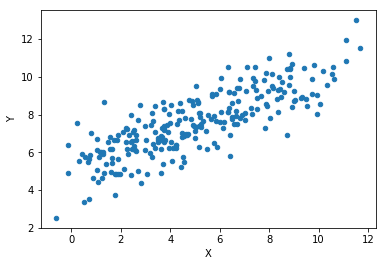

In [7]:
data.sample(n=200).plot(kind="scatter" ,x ="X" , y = "Y" )

In [8]:
batch_size = 10

In [9]:
m = tf.Variable(tf.random_uniform([1], 0 , 1))
b = tf.Variable(tf.random_uniform([1], 0 , 1))

In [10]:
x = tf.placeholder(tf.float32 , [batch_size])

In [11]:
y = tf.placeholder(tf.float32 , [batch_size])

In [12]:
y_ = m*x + b

In [13]:
err = tf.reduce_sum(tf.square(y - y_))

In [14]:
opt = tf.train.GradientDescentOptimizer(learning_rate=0.001)

In [15]:
train = opt.minimize(err)

In [16]:
init = tf.global_variables_initializer()

In [17]:
with tf.Session() as sess:
    sess.run(init)
    batches = 1000
    
    for i in range(batches):
        randIndex = np.random.randint(len(X) , size=batch_size)
        feed = {x:X[randIndex] , y:Y[randIndex]}
        
        sess.run(train , feed_dict= feed)
    
    m_ , b_ = sess.run([m , b])

In [18]:
m_

array([ 0.55243611], dtype=float32)

In [19]:
b_

array([ 4.73796606], dtype=float32)